## 1. Data 불러오기

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
# 데이터 불러오기
df = pd.read_csv('../../data/english_thumbnailtext_preprocessed.csv', encoding='UTF-8')
df.head(3)

,views,content,area,content_tokens
0,3,Sweets How,3,"['sweet', 'how']"
1,4,,0,[]
2,3,,0,[]


## 2. data to sequence

In [5]:
from keras.utils import to_categorical #2번 실행하기

### a. views - one hot encoding

In [6]:
y = to_categorical(df['views']).astype('int64')
y

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=int64)

### b. area - one hot encoding

In [7]:
area = to_categorical(df['area']).astype('int64')
area

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

### c. content - token to sequence

In [8]:
#df['content_tokens'][0].strip("[]").split(', ')[0].strip("'")
for index in range(len(df)):
    df['content_tokens'][index] = [ s.strip("'") for s in df['content_tokens'][index].strip("[]").split(', ')]
content = df['content_tokens']

<ipython-input-8-be05aa26f632>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_tokens'][index] = [ s.strip("'") for s in df['content_tokens'][index].strip("[]").split(', ')]


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(content)
print(tokenizer.word_index)

{'': 1, 'vlog': 2, '!': 3, 'in': 4, 'a': 5, '#': 6, '?': 7, 'the': 8, 'my': 9, 'no': 10, 'to': 11, 'day': 12, '.': 13, 'i': 14, '"\'s"': 15, 'copyright': 16, '1': 17, 'of': 18, 'life': 19, '&': 20, 'challeng': 21, 'with': 22, '2': 23, ',': 24, 'de': 25, 'new': 26, 'tour': 27, 'viog': 28, 'me': 29, '3': 30, 'first': 31, ':': 32, 'for': 33, 'it': 34, 'do': 35, 'cambridg': 36, '24': 37, 'part': 38, 'birthday': 39, 'school': 40, 'home': 41, ')': 42, 'week': 43, 'la': 44, 'what': 45, 'na': 46, 'you': 47, 'shop': 48, '10': 49, '$': 50, 'hous': 51, 'en': 52, '(': 53, '5': 54, 'univers': 55, '...': 56, 'is': 57, 'move': 58, 'hour': 59, 'offici': 60, 'and': 61, '6': 62, 'aguilar': 63, 'el': 64, 'vs': 65, 'lo': 66, 'colleg': 67, 'travel': 68, 'on': 69, 'con': 70, '-': 71, '2019': 72, 'our': 73, 's': 74, 'prank': 75, 'mi': 76, 'live': 77, '4': 78, 'o': 79, 'time': 80, 'view': 81, 'year': 82, 'n': 83, 'happi': 84, 'famili': 85, 'sa': 86, 'at': 87, 'we': 88, 'r': 89, 'e': 90, 'daili': 91, 'routin':

In [11]:
# keras tokenizer -> 텍스트 시퀀스 숫자 시퀀스로 변환
content = tokenizer.texts_to_sequences(content)

In [12]:
content

[[971, 104],
 [1],
 [1],
 [14, 1672, 40, 214, 92],
 [1],
 [972, 1673],
 [5, 43, 4, 9, 19],
 [1674, 1675, 1676],
 [48, 116, 682, 48, 12, 4, 9, 19, 77, 4, 44],
 [1],
 [1],
 [1],
 [1677, 2],
 [5, 82, 1678, 3],
 [683, 98, 55, 58, 4, 2, 99],
 [5, 43, 4, 9, 19],
 [1],
 [1679, 2],
 [1680],
 [1],
 [306, 73, 520],
 [2, 973, 1681, 46],
 [46, 1682, 18, 46, 974],
 [14, 238, 1683],
 [1],
 [975, 976, 2, 14, 977, 978],
 [163, 1684, 4, 979, 18, 29],
 [980, 1685],
 [1686],
 [164, 2, 6, 78, 1687, 684],
 [1688, 1689, 1690, 1691, 1692, 48, 685],
 [1],
 [1693, 7, 1694, 7, 1695],
 [355, 92],
 [5, 25],
 [10, 1696, 1697, 1698, 981, 686, 687, 1699],
 [688, 165],
 [1700,
  356,
  173,
  982,
  192,
  1701,
  173,
  193,
  127,
  2,
  307,
  11,
  425,
  61,
  1702,
  521,
  1703,
  7],
 [983, 1704, 215, 1705, 70, 64, 1706],
 [1707],
 [1708, 984, 1709],
 [1710],
 [985, 10],
 [1711, 689],
 [1712, 522, 357, 271, 690, 986, 24, 92, 24, 1713, 24, 1714],
 [523, 1715, 1716, 3, 1717, 7, 3],
 [1],
 [38, 78, 62, 62, 987, 

In [13]:
threshold = 2                         
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0                          # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0                        # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0                         # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5882
등장 빈도가 1번 이하인 희귀 단어의 수: 4211
단어 집합에서 희귀 단어의 비율: 71.59129547772866
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 22.69469145782808


In [ ]:
'''
# 전체 단어 개수 중 빈도수 1이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
for w in words_frequency:
    del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제

print('단어 집합의 크기 :',len(tokenizer.word_counts))
print('단어 집합의 크기 :',len(tokenizer.word_index))
'''

In [14]:
import matplotlib.pyplot as plt

발화문의 최대 길이 : 66
발화문의 평균 길이 : 3.865625


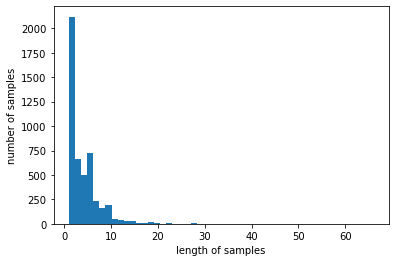

In [15]:
print('발화문의 최대 길이 :',max(len(l) for l in content))
print('발화문의 평균 길이 :',sum(map(len, content))/len(content))
plt.hist([len(s) for s in content], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [16]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [17]:
max_len = 20
below_threshold_len(max_len, content)

전체 샘플 중 길이가 20 이하인 샘플의 비율: 99.45833333333334


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
# 모든 샘플의 길이 max_len으로 맞추기
content = pad_sequences(content, maxlen = max_len)

In [20]:
content

array([[   0,    0,    0, ...,    0,  971,  104],
       [   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    0,    1],
       ...,
       [   0,    0,    0, ...,   71, 5880,  231],
       [   0,    0,    0, ..., 5882,  643,   29],
       [   0,    0,    0, ...,    0,    0,    1]])

## 3. set train & test data

In [21]:
X = np.concatenate((np.array(content), area), axis=1)

In [22]:
content[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 971, 104])

In [23]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 971, 104,   0,   0,   0,   1,   0],
      dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
X_test

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [27]:
y_train

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=int64)

In [ ]:
#print(tokenizer.word_index)

## 4. LSTM

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Bidirectional
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
model = Sequential([
    Embedding(total_cnt+1, 100),  ##total_cnt가 아니라 vocab_size로 한번 나오는 단어는 제거하고 다시 해보기 
    LSTM(128,  dropout= 0.2),
    Dense(6,activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         588300    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 706,322
Trainable params: 706,322
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('Bi-LSTM_class6.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=50, validation_data=(X_test, y_test))

Epoch 1/10
76/77 [============================>.] - ETA: 0s - loss: 1.5836 - acc: 0.3218- ETA: 2s 
Epoch 00001: val_acc improved from -inf to 0.32604, saving model to Bi-LSTM_class6.h5
77/77 [==============================] - 4s 57ms/step - loss: 1.5845 - acc: 0.3221 - val_loss: 1.5229 - val_acc: 0.3260
Epoch 2/10
77/77 [==============================] - ETA: 0s - loss: 1.5540 - acc: 0.3464
Epoch 00002: val_acc improved from 0.32604 to 0.39479, saving model to Bi-LSTM_class6.h5
77/77 [==============================] - 4s 47ms/step - loss: 1.5540 - acc: 0.3464 - val_loss: 1.5098 - val_acc: 0.3948
Epoch 3/10
76/77 [============================>.] - ETA: 0s - loss: 1.4433 - acc: 0.4176
Epoch 00003: val_acc did not improve from 0.39479
77/77 [==============================] - 4s 48ms/step - loss: 1.4420 - acc: 0.4180 - val_loss: 1.6798 - val_acc: 0.3854
Epoch 4/10
77/77 [==============================] - ETA: 0s - loss: 1.1653 - acc: 0.5516- ETA: 1s - los
Epoch 00004: val_acc did not impro

## 5. model test

In [ ]:
loaded_model = load_model('Bi-LSTM_class6.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

In [ ]:
pred = np.argmax(loaded_model.predict(X_test), axis=-1)

In [ ]:
true = [np.argmax(y_test[i]) for i in range(len(y_test))]

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(true, pred))

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(true, pred)  # confusion matrix 계산
# plt.figure(figsize = (14, 8))
# sns.heatmap(conf_mat, annot=True) # heatmap으로 나타내기

# Class 별 Accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)  # 각 클래스 별 accuracy 담은 list
class_accuracy = pd.DataFrame(class_accuracy, columns = ['Accuracy']) # dataframe 화하기

In [ ]:
cat_to_id = {0:0, 1:1, 10:2, 100:3, 1000:4, 10000:5}
id_to_cat = {0:0, 1:1, 2:10, 3:100, 4:1000, 5:10000}

In [ ]:
class_accuracy.insert(0, 'View Category', list(cat_to_id.keys())[:20])
class_accuracy